# Levenberg-Marquardt Fitting

Author: Maurice Wilson

Objective:
Use Levenber-Marquardt Statistics to determine the best 4 fitting parameters for simulated data of a normal distribution.

In [18]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   # necessary for Notebook and QtConsole
from scipy.optimize import leastsq

In [19]:
x_vals = np.linspace(0,10, 300)

A = 10.
B=5.
C=2.
E=4.

A_g = 20
B_g = 7
C_g = 5.
E_g = 9

sig = 0.25

sigmas = np.ones(len(x_vals))*sig

In [20]:
noise = sigmas*np.random.randn(len(x_vals)) 
Data = A*np.exp(-(1.0/2.0)*((B-x_vals)/C)**2)+E + noise

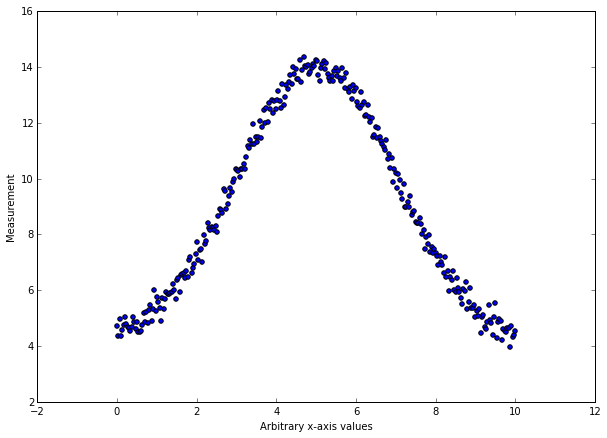

In [21]:

plt.figure(figsize=(10,7))
plt.scatter(x_vals, Data, marker='o')
plt.ylabel('Measurement')
plt.xlabel('Arbitrary x-axis values')


In [22]:
eps_data = sig
def residual(vars, x_vals, Data, eps_data):
    amp = vars[0]
    centroid = vars[1]
    width = vars[2]
    offset = vars[3]

    model = amp*np.exp(-(1.0/2.0)*((centroid-x_vals)/width)**2)+offset # just the 'Data' without the noise 

    return (Data-model)/eps_data

In [27]:
def mwgaussfit(x_vals, Data, eps_data):
    vars = [A_g, B_g, C_g, E_g]
    out = leastsq(residual, vars, args=(x_vals, Data, eps_data))
    print('Best Fitting Parameters: \nA = '+str(out[0][0])+'\nB = '+str(out[0][1])+'\nC = '+str(out[0][2])+'\nD = '+str(out[0][3]))
    return out

Best Fitting Parameters: 
A = 10.0332472863
B = 5.00660239344
C = 1.99338121722
D = 4.0142970844


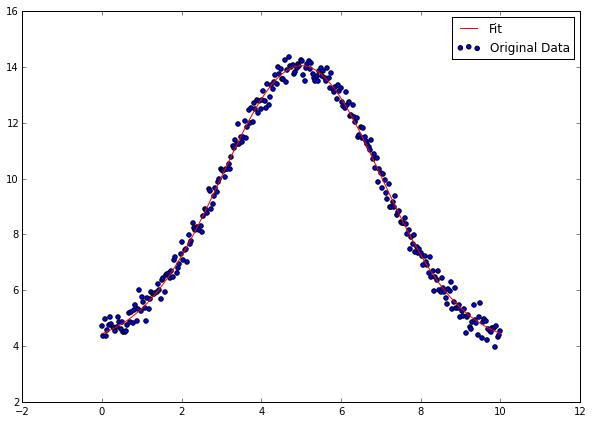

In [28]:
plt.figure(figsize=(10,7))
out = mwgaussfit(x_vals, Data, eps_data)  
new_D = out[0][0]*np.exp(-(1.0/2.0)*((out[0][1]-x_vals)/out[0][2])**2)+out[0][3]
plt.plot(x_vals, new_D, 'r', label='Fit')
plt.scatter(x_vals, Data, label='Original Data')
plt.legend()